In [644]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import numpy as np

# Load data
df=pd.read_excel('BTC_Hash_2024-01-17.xlsx')
df

,Time,"BTC / Price, USD","BTC / Hash rate, mean"
0,2009-01-09,NaN,9.444951e-07
1,2009-01-10,NaN,3.032326e-06
2,2009-01-11,NaN,4.623055e-06
3,2009-01-12,NaN,4.672765e-06
4,2009-01-13,NaN,6.114363e-06
...,...,...,...
5482,2024-01-13,42846.954470,5.785492e+08
5483,2024-01-14,41888.151307,4.657503e+08
5484,2024-01-15,42528.919249,4.148089e+08
5485,2024-01-16,43171.447224,4.548343e+08


In [645]:
# Feature Engineering
df['Date'] = pd.to_datetime(df['Time'])
df.set_index('Date', inplace=True)
df

,Time,"BTC / Price, USD","BTC / Hash rate, mean"
Date,,,
2009-01-09,2009-01-09,NaN,9.444951e-07
2009-01-10,2009-01-10,NaN,3.032326e-06
2009-01-11,2009-01-11,NaN,4.623055e-06
2009-01-12,2009-01-12,NaN,4.672765e-06
2009-01-13,2009-01-13,NaN,6.114363e-06
...,...,...,...
2024-01-13,2024-01-13,42846.954470,5.785492e+08
2024-01-14,2024-01-14,41888.151307,4.657503e+08
2024-01-15,2024-01-15,42528.919249,4.148089e+08


In [646]:
# Shift Bitcoin prices for different prediction horizons (1 to 30 days ahead)
for i in range(1, 31):
    df[f'BTC_Price_{i}d_Ahead'] = df['BTC / Price, USD'].shift(-i)

df

,Time,"BTC / Price, USD","BTC / Hash rate, mean",BTC_Price_1d_Ahead,BTC_Price_2d_Ahead,BTC_Price_3d_Ahead,BTC_Price_4d_Ahead,BTC_Price_5d_Ahead,BTC_Price_6d_Ahead,BTC_Price_7d_Ahead,...,BTC_Price_21d_Ahead,BTC_Price_22d_Ahead,BTC_Price_23d_Ahead,BTC_Price_24d_Ahead,BTC_Price_25d_Ahead,BTC_Price_26d_Ahead,BTC_Price_27d_Ahead,BTC_Price_28d_Ahead,BTC_Price_29d_Ahead,BTC_Price_30d_Ahead
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-09,2009-01-09,NaN,9.444951e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-10,2009-01-10,NaN,3.032326e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-11,2009-01-11,NaN,4.623055e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-12,2009-01-12,NaN,4.672765e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-13,2009-01-13,NaN,6.114363e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-13,2024-01-13,42846.954470,5.785492e+08,41888.151307,42528.919249,43171.447224,42689.304327,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-14,2024-01-14,41888.151307,4.657503e+08,42528.919249,43171.447224,42689.304327,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-15,2024-01-15,42528.919249,4.148089e+08,43171.447224,42689.304327,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [647]:
# Calculate moving averages for hash rate for different windows (1 to 30 days)
for i in range(1, 31):
    df[f'Hash_Rate_MA_{i}d'] = df['BTC / Hash rate, mean'].rolling(window=i).mean()

df

,Time,"BTC / Price, USD","BTC / Hash rate, mean",BTC_Price_1d_Ahead,BTC_Price_2d_Ahead,BTC_Price_3d_Ahead,BTC_Price_4d_Ahead,BTC_Price_5d_Ahead,BTC_Price_6d_Ahead,BTC_Price_7d_Ahead,...,Hash_Rate_MA_21d,Hash_Rate_MA_22d,Hash_Rate_MA_23d,Hash_Rate_MA_24d,Hash_Rate_MA_25d,Hash_Rate_MA_26d,Hash_Rate_MA_27d,Hash_Rate_MA_28d,Hash_Rate_MA_29d,Hash_Rate_MA_30d
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-09,2009-01-09,NaN,9.444951e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-10,2009-01-10,NaN,3.032326e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-11,2009-01-11,NaN,4.623055e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-12,2009-01-12,NaN,4.672765e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-13,2009-01-13,NaN,6.114363e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-13,2024-01-13,42846.954470,5.785492e+08,41888.151307,42528.919249,43171.447224,42689.304327,NaN,NaN,NaN,...,5.263961e+08,5.279916e+08,5.294743e+08,5.277664e+08,5.260614e+08,5.266751e+08,5.279869e+08,5.270541e+08,5.264164e+08,5.270480e+08
2024-01-14,2024-01-14,41888.151307,4.657503e+08,42528.919249,43171.447224,42689.304327,NaN,NaN,NaN,NaN,...,5.194278e+08,5.236395e+08,5.252854e+08,5.268191e+08,5.252858e+08,5.237417e+08,5.244186e+08,5.257642e+08,5.249402e+08,5.243942e+08
2024-01-15,2024-01-15,42528.919249,4.148089e+08,43171.447224,42689.304327,NaN,NaN,NaN,NaN,NaN,...,5.154881e+08,5.146724e+08,5.189077e+08,5.206822e+08,5.223387e+08,5.210367e+08,5.197072e+08,5.205040e+08,5.219381e+08,5.212692e+08


In [648]:
# Drop rows with NaN values resulting from the shifts and rolling means
df.dropna(inplace=True)

df

,Time,"BTC / Price, USD","BTC / Hash rate, mean",BTC_Price_1d_Ahead,BTC_Price_2d_Ahead,BTC_Price_3d_Ahead,BTC_Price_4d_Ahead,BTC_Price_5d_Ahead,BTC_Price_6d_Ahead,BTC_Price_7d_Ahead,...,Hash_Rate_MA_21d,Hash_Rate_MA_22d,Hash_Rate_MA_23d,Hash_Rate_MA_24d,Hash_Rate_MA_25d,Hash_Rate_MA_26d,Hash_Rate_MA_27d,Hash_Rate_MA_28d,Hash_Rate_MA_29d,Hash_Rate_MA_30d
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-18,2010-07-18,0.085840,1.552225e-03,0.080800,0.074736,0.079193,0.058470,0.060593,0.054540,0.050541,...,5.727378e-04,5.545089e-04,5.370682e-04,5.207192e-04,5.060572e-04,4.928079e-04,4.795480e-04,4.671735e-04,4.565760e-04,4.456770e-04
2010-07-19,2010-07-19,0.080800,1.570274e-03,0.074736,0.079193,0.058470,0.060593,0.054540,0.050541,0.056000,...,6.405307e-04,6.180803e-04,5.986726e-04,5.801185e-04,5.627015e-04,5.469887e-04,5.327141e-04,5.185025e-04,5.052115e-04,4.936993e-04
2010-07-20,2010-07-20,0.074736,1.633446e-03,0.079193,0.058470,0.060593,0.054540,0.050541,0.056000,0.058622,...,7.105510e-04,6.856633e-04,6.622267e-04,6.417882e-04,6.222516e-04,6.038839e-04,5.872279e-04,5.720260e-04,5.569489e-04,5.428193e-04
2010-07-21,2010-07-21,0.079193,1.868085e-03,0.058470,0.060593,0.054540,0.050541,0.056000,0.058622,0.058911,...,7.911474e-04,7.631662e-04,7.370729e-04,7.124708e-04,6.908400e-04,6.701683e-04,6.507062e-04,6.329728e-04,6.167177e-04,6.006534e-04
2010-07-22,2010-07-22,0.058470,1.588324e-03,0.060593,0.054540,0.050541,0.056000,0.058622,0.058911,0.069900,...,8.570898e-04,8.273827e-04,7.990426e-04,7.725417e-04,7.475049e-04,7.253586e-04,7.041740e-04,6.841925e-04,6.659159e-04,6.491045e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-14,2023-12-14,43033.137156,4.884860e+08,41978.097020,42203.214045,41428.665786,42635.733191,42271.863026,43605.155555,43870.238234,...,4.876700e+08,4.869865e+08,4.856635e+08,4.857904e+08,4.877076e+08,4.899720e+08,4.895680e+08,4.893077e+08,4.888436e+08,4.884104e+08
2023-12-15,2023-12-15,41978.097020,5.453645e+08,42203.214045,41428.665786,42635.733191,42271.863026,43605.155555,43870.238234,44009.501655,...,4.879182e+08,4.902925e+08,4.895247e+08,4.881510e+08,4.881734e+08,4.899252e+08,4.920236e+08,4.915607e+08,4.912407e+08,4.907276e+08
2023-12-16,2023-12-16,42203.214045,5.085608e+08,41428.665786,42635.733191,42271.863026,43605.155555,43870.238234,44009.501655,43768.806752,...,4.877686e+08,4.888565e+08,4.910868e+08,4.903179e+08,4.889674e+08,4.889575e+08,4.906154e+08,4.926142e+08,4.921470e+08,4.918180e+08


In [649]:
# Select features and target variables
features = df.filter(like='Hash_Rate_MA').columns
# Add BTC price on the current date as an additional feature
features = features.append(pd.Index(['BTC / Price, USD']))

X = df[features]
y_columns = [f'BTC_Price_{i}d_Ahead' for i in range(1, 31)]
y = df[y_columns]

In [650]:
# Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Determine the split point based on the desired percentage for the test set
split_point = int(len(X) * 0.8)

# Split the data into training and testing sets
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

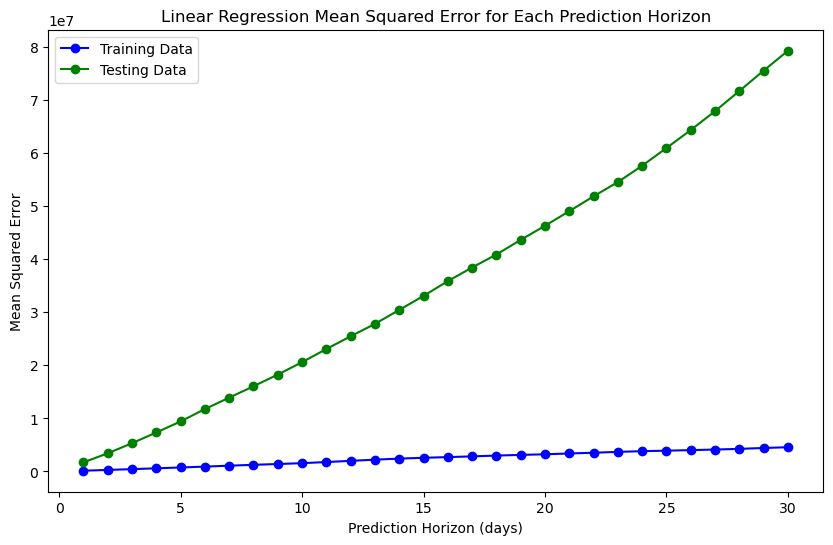

In [651]:
# Lists to store MSE for training and testing data
train_mse_list = []
test_mse_list = []

# Initialize LinearRegression
linear_model = LinearRegression()

# Train the linear regression model and evaluate performance
for col in y_columns:
    # Train the linear regression model
    linear_model.fit(X_train, y_train[col])

    # Predict on the training set
    linear_train_predictions = linear_model.predict(X_train)

    # Calculate MSE for training data
    train_mse = mean_squared_error(y_train[col], linear_train_predictions)
    train_mse_list.append(train_mse)

    # Predict on the test set
    linear_test_predictions = linear_model.predict(X_test)

    # Calculate MSE for testing data
    test_mse = mean_squared_error(y_test[col], linear_test_predictions)
    test_mse_list.append(test_mse)

# Plot the MSE for training and testing data across different horizons
horizons = np.arange(1, 31)

plt.figure(figsize=(10, 6))
plt.plot(horizons, train_mse_list, label='Training Data', marker='o', color='blue')
plt.plot(horizons, test_mse_list, label='Testing Data', marker='o', color='green')
plt.title('Linear Regression Mean Squared Error for Each Prediction Horizon')
plt.xlabel('Prediction Horizon (days)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


Use 1-day as a prediction horizon.

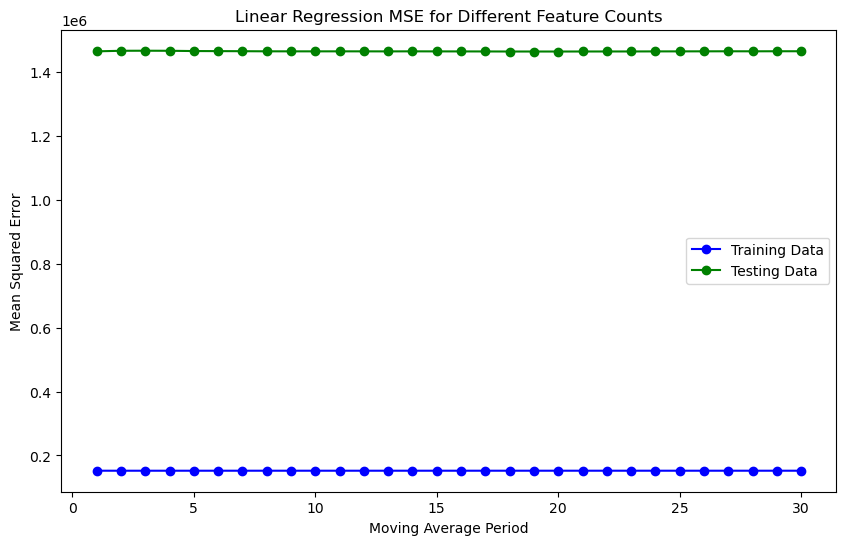

In [652]:
# Define the target column for 4-day ahead prediction
target_column = 'BTC_Price_1d_Ahead'

# Lists to store MSE for testing data
del train_mse 
del test_mse
train_mse_list = []
test_mse_list = []

# Iterate over the features count
for i in range(1, 31):
    # Construct features dynamically
    features = [f'Hash_Rate_MA_{i}d'] + ['BTC / Price, USD']

    # Initialize LinearRegression
    linear_model = LinearRegression()

    # Train the linear regression model
    linear_model.fit(X_train[features], y_train[target_column])

    # Predict on the training set
    linear_train_predictions = linear_model.predict(X_train[features])

    # Calculate MSE for training data
    train_mse = mean_squared_error(y_train[target_column], linear_train_predictions)
    train_mse_list.append(train_mse)

    # Predict on the test set
    linear_test_predictions = linear_model.predict(X_test[features])

    # Calculate MSE for testing data
    test_mse = mean_squared_error(y_test[target_column], linear_test_predictions)
    test_mse_list.append(test_mse)

# Plot the MSE values

# Plot the MSE for training and testing data across different horizons
MAs = np.arange(1, 31)

plt.figure(figsize=(10, 6))
plt.plot(MAs, train_mse_list, label='Training Data', marker='o', color='blue')
plt.plot(MAs, test_mse_list, label='Testing Data', marker='o', color='green')
plt.title('Linear Regression MSE for Different Feature Counts')
plt.xlabel('Moving Average Period')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

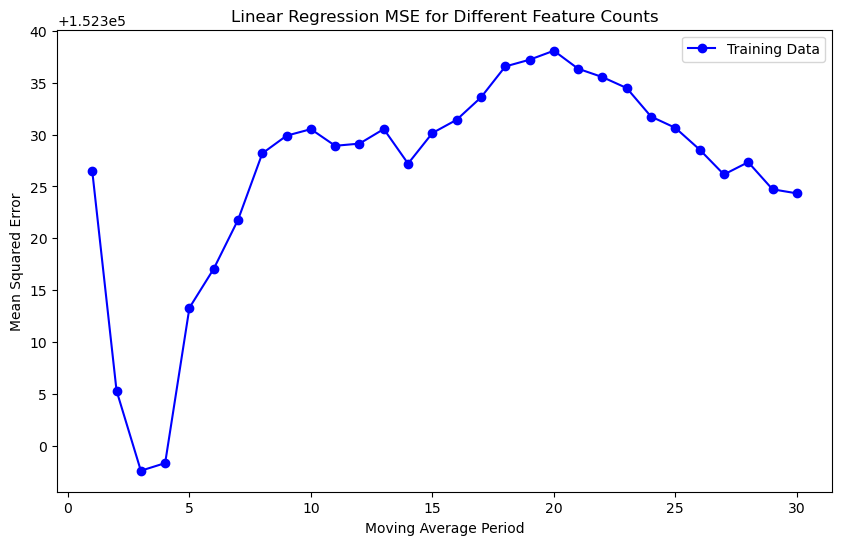

In [653]:
#Plot separately for the training MSE

plt.figure(figsize=(10, 6))
plt.plot(MAs, train_mse_list, label='Training Data', marker='o', color='blue')
plt.title('Linear Regression MSE for Different Feature Counts')
plt.xlabel('Moving Average Period')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

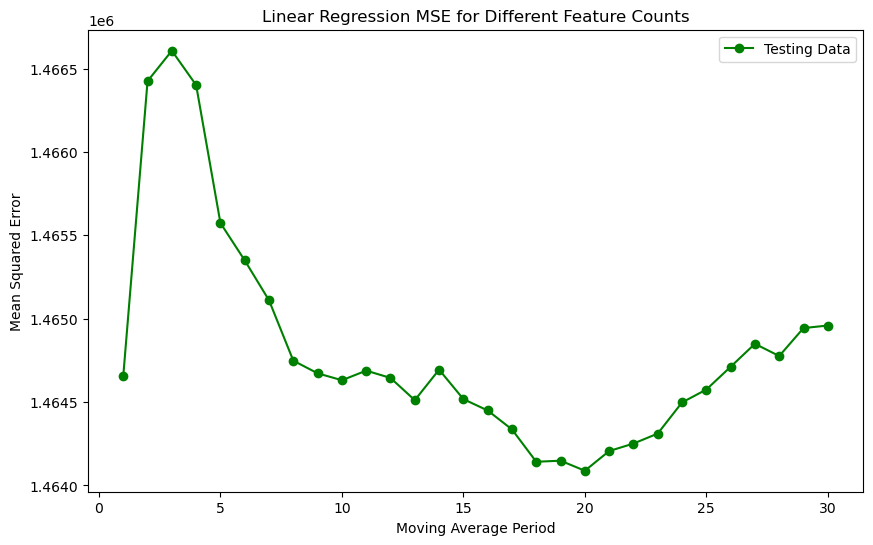

In [654]:
#Plot separately for the testing MSE

plt.figure(figsize=(10, 6))
plt.plot(MAs, test_mse_list, label='Testing Data', marker='o', color='green')
plt.title('Linear Regression MSE for Different Feature Counts')
plt.xlabel('Moving Average Period')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

Should use 20-day moving average to give the lowest MSE.

In [655]:
# Select the relevant columns
feature_column = 'Hash_Rate_MA_20d'

# Train the linear regression model
features = [feature_column, 'BTC / Price, USD']
linear_model.fit(X_train[features], y_train[target_column])

# Predict on the test set
y_test['Predicted Price'] = linear_model.predict(X_test[features])

/var/folders/lm/m8jxh_xd57x359zxgh0k92c80000gn/T/ipykernel_14802/4087305493.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Predicted Price'] = linear_model.predict(X_test[features])


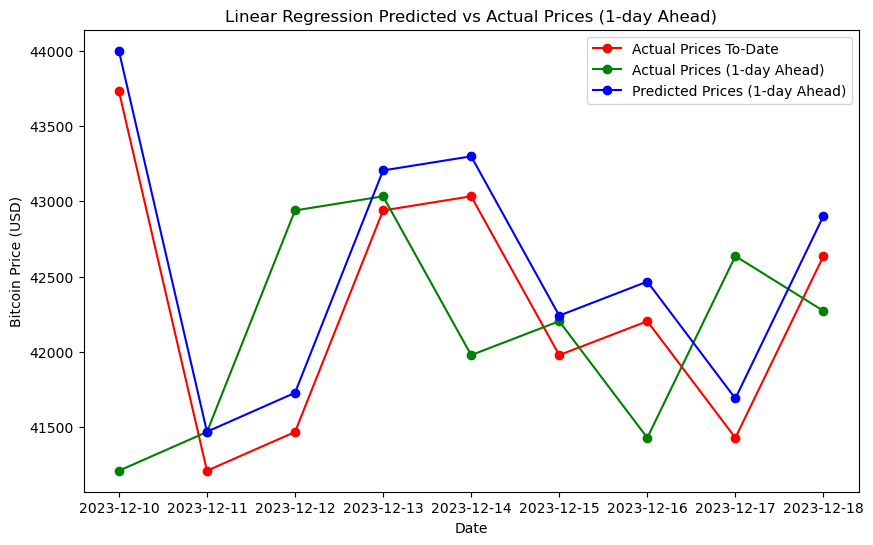

In [674]:
# Plot the predicted and actual prices

# Filter for the date range visibility
start_date = '2023-12-10'
end_date = '2024-01-17'

# Filter the date range
X_test_filtered = X_test.loc[(y_test.index >= start_date) & (y_test.index <= end_date)]
y_test_filtered = y_test.loc[(y_test.index >= start_date) & (y_test.index <= end_date)]

# Plot the predicted and actual prices
plt.figure(figsize=(10, 6))
plt.plot(X_test_filtered.index, X_test_filtered['BTC / Price, USD'], label='Actual Prices To-Date', color='red', marker='o')
plt.plot(y_test_filtered.index, y_test_filtered[target_column], label='Actual Prices (1-day Ahead)', color='green', marker='o')
plt.plot(y_test_filtered.index, y_test_filtered['Predicted Price'], label='Predicted Prices (1-day Ahead)', color='blue', marker='o')
plt.title('Linear Regression Predicted vs Actual Prices (1-day Ahead)')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.show()


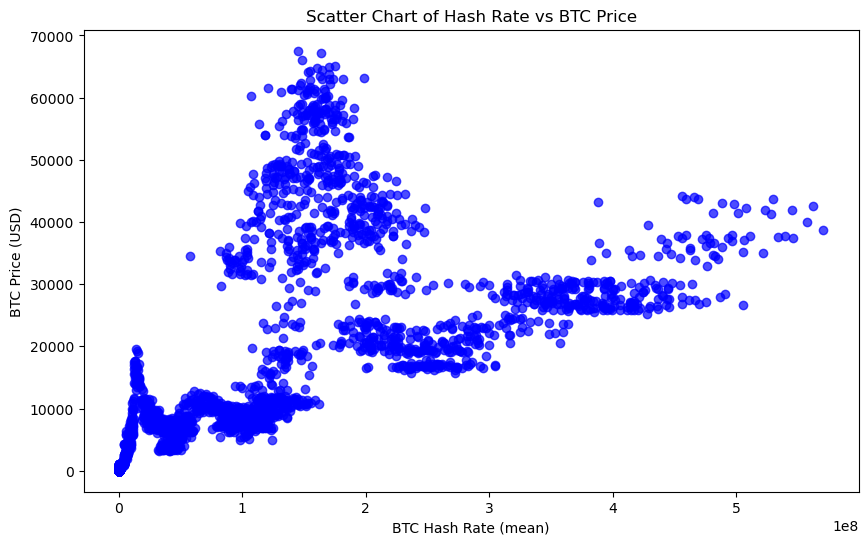

In [660]:
hash_rate_column = 'BTC / Hash rate, mean'
btc_price_column = 'BTC / Price, USD'

# Plot scatter chart
plt.figure(figsize=(10, 6))
plt.scatter(df[hash_rate_column], df[btc_price_column], color='blue', alpha=0.7)
plt.title('Scatter Chart of Hash Rate vs BTC Price')
plt.xlabel('BTC Hash Rate (mean)')
plt.ylabel('BTC Price (USD)')
plt.show()